# Selecting final data to be used in model training

## Imports and data reads

In [19]:
from pathlib import Path

import pandas as pd
import seaborn as sns

sns.set_theme("talk")

In [20]:
project_dir = Path.cwd().parent.parent

intermediate = pd.read_csv(str (project_dir / 'data/intermediate/rent.csv'), index_col=0)
intermediate.head()

city       district   latitude  \
1  vilniuje     snipiskese  54.720888   
2  vilniuje  naujininkuose  54.662883   
3  vilniuje  fabijoniskese  54.742411   
5  vilniuje   senamiestyje  54.681746   
6  vilniuje  naujininkuose  54.662866   

                                         listing_url  longitude  \
1  https://www.aruodas.lt/butu-nuoma-vilniuje-sni...  25.278539   
2  https://www.aruodas.lt/butu-nuoma-vilniuje-nau...  25.277840   
3  https://www.aruodas.lt/butu-nuoma-vilniuje-fab...  25.229110   
5  https://www.aruodas.lt/butu-nuoma-vilniuje-sen...  25.279369   
6  https://www.aruodas.lt/butu-nuoma-vilniuje-nau...  25.277922   

               street  floor_area_m2  monthly_rent  number_of_rooms  floor  \
1  juozo-balcikonio-g           19.0         326.0              1.0    3.0   
2            telsiu-g           42.0         399.0              3.0    2.0   
3  salomejos-neries-g           50.0         360.0              2.0   11.0   
5         klaipedos-g          105.0        1500.0              4.0    3.0   
6            telsiu-g           42.0         350.0              1.0    1.0   

   number_of_floors  build_year building_type            heating_type  \
1               5.0      2020.0       Mūrinis  Centrinis kolektorinis   
2               4.0      2015.0       Mūrinis             Geoterminis   
3              12.0      2008.0       Mūrinis                    Kita   
5               3.0      2013.0       Mūrinis  Centrinis kolektorinis   
6               4.0      2015.0       Mūrinis             Geoterminis   

  equipment  
1  Įrengtas  
2  Įrengtas  
3  Įrengtas  
5  Įrengtas  
6  Įrengtas

## Cutting off outliers

Text(0.5, 1.02, '"Everything against everything" plot looking for outliers')

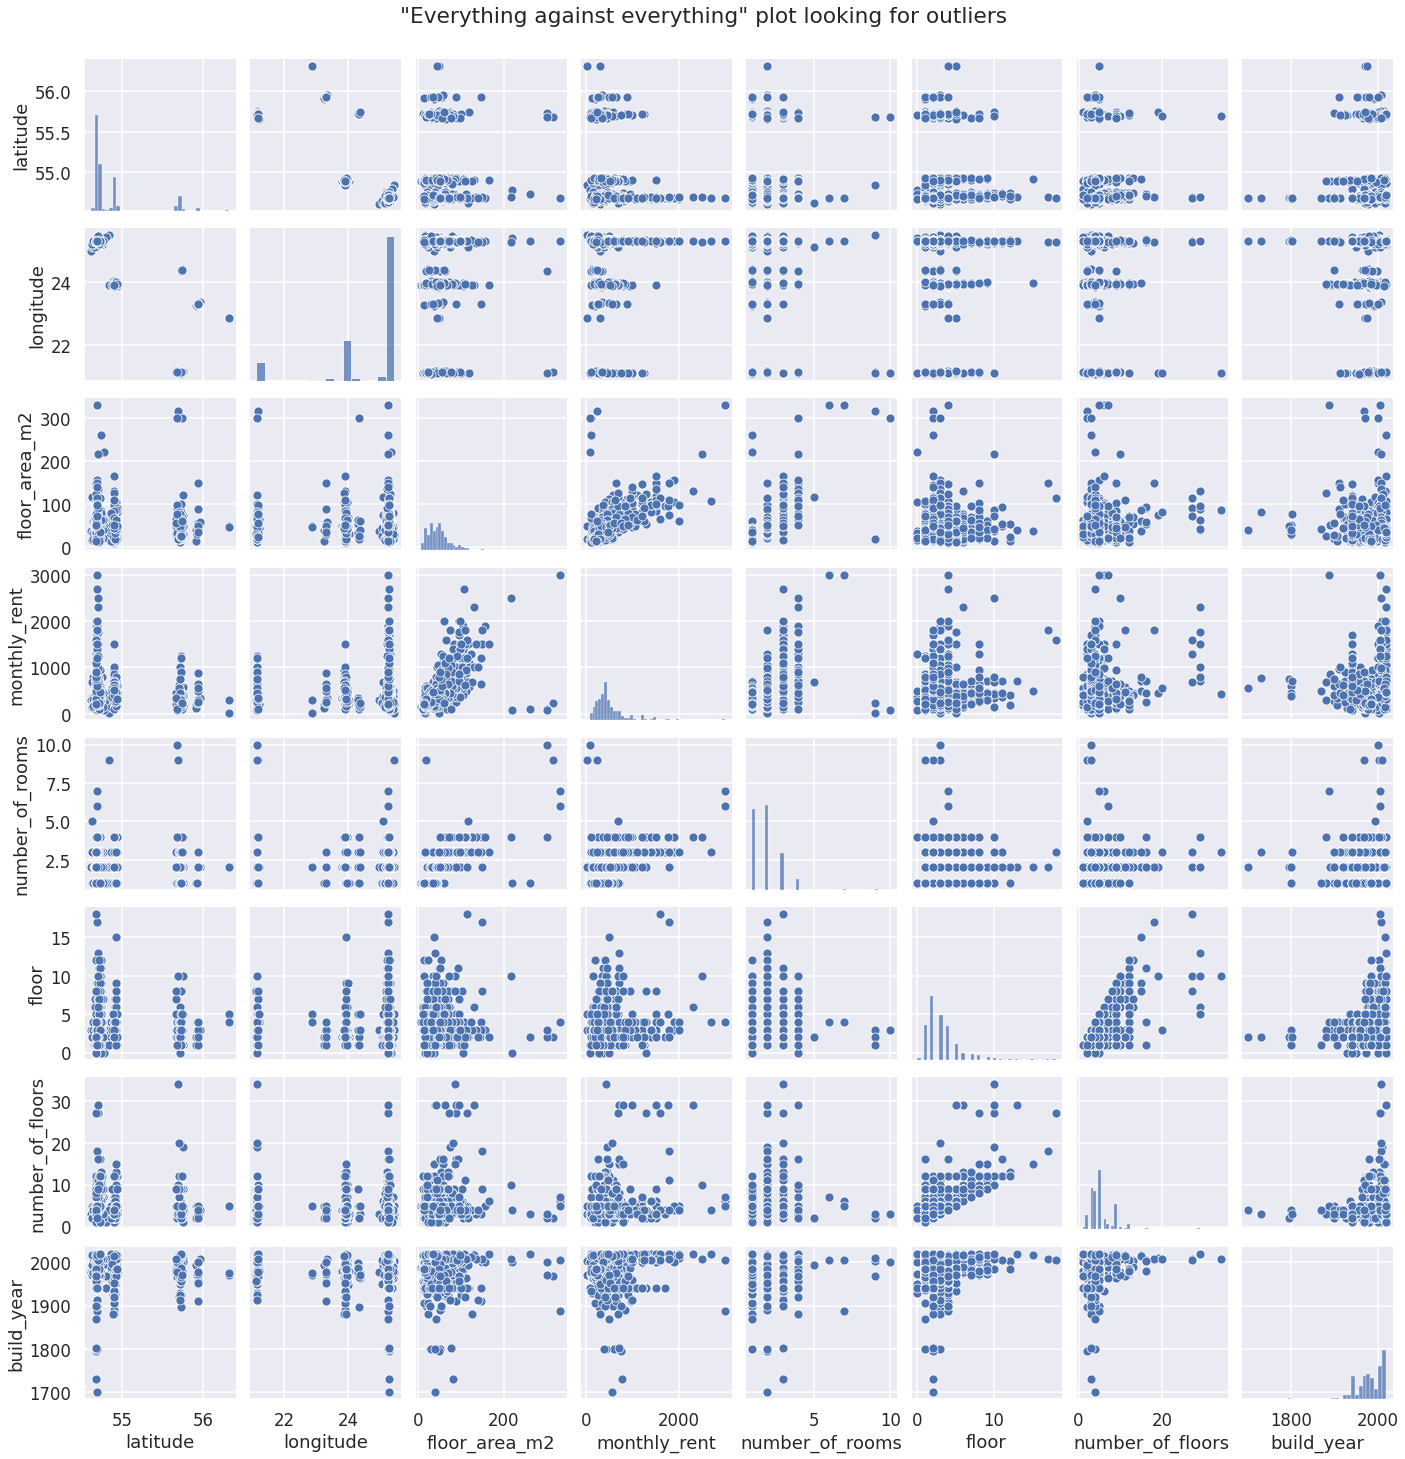

In [21]:
g = sns.pairplot(data=intermediate)
g.fig.suptitle('"Everything against everything" plot looking for outliers', y=1.02)

1. Listings seem to be concentrated in a few cities, let's see if I need to cut off
1. There seem to be a few listing with high floor area that don't generally follow same relationship as others. I'll cut off floor area > 300 square meters
1. There is a bit of listings for very old buildings. I'll cut off all built before 1850

### Dropping listings of cities we don't have enough data

Text(0.5, 1.02, 'Distribution of rent listings across cities')

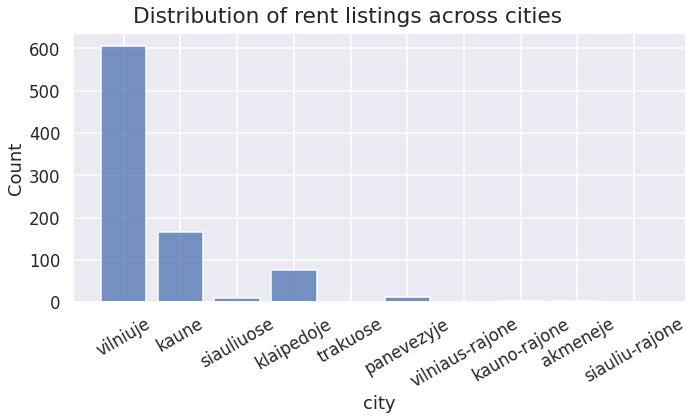

In [38]:
g = sns.displot(data=intermediate, x="city", aspect=2, shrink=.8)
g.set_xticklabels(rotation=30)
g.fig.suptitle("Distribution of rent listings across cities", y=1.02)

Yup, we only have more than 50 listings for Vilnius, Kaunas and Klaipėda.

In [31]:
final = intermediate[intermediate.city.isin(["vilniuje", "kaune", "klaipedoje"])]

### Dropping listings of old buildings

In [32]:
final = final[final.build_year > 1850]

### Dropping very large listings

In [33]:
final = final[final.floor_area_m2 < 300]

In [35]:
final2 = pd.read_csv(str(project_dir / "data/final/rent.csv"), index_col=0)
final2.head()

city       district   latitude  \
1  vilniuje     snipiskese  54.720888   
2  vilniuje  naujininkuose  54.662883   
3  vilniuje  fabijoniskese  54.742411   
5  vilniuje   senamiestyje  54.681746   
6  vilniuje  naujininkuose  54.662866   

                                         listing_url  longitude  \
1  https://www.aruodas.lt/butu-nuoma-vilniuje-sni...  25.278539   
2  https://www.aruodas.lt/butu-nuoma-vilniuje-nau...  25.277840   
3  https://www.aruodas.lt/butu-nuoma-vilniuje-fab...  25.229110   
5  https://www.aruodas.lt/butu-nuoma-vilniuje-sen...  25.279369   
6  https://www.aruodas.lt/butu-nuoma-vilniuje-nau...  25.277922   

               street  floor_area_m2  monthly_rent  number_of_rooms  floor  \
1  juozo-balcikonio-g           19.0         326.0              1.0    3.0   
2            telsiu-g           42.0         399.0              3.0    2.0   
3  salomejos-neries-g           50.0         360.0              2.0   11.0   
5         klaipedos-g          105.0        1500.0              4.0    3.0   
6            telsiu-g           42.0         350.0              1.0    1.0   

   number_of_floors  build_year building_type            heating_type  \
1               5.0      2020.0       Mūrinis  Centrinis kolektorinis   
2               4.0      2015.0       Mūrinis             Geoterminis   
3              12.0      2008.0       Mūrinis                    Kita   
5               3.0      2013.0       Mūrinis  Centrinis kolektorinis   
6               4.0      2015.0       Mūrinis             Geoterminis   

  equipment  
1  Įrengtas  
2  Įrengtas  
3  Įrengtas  
5  Įrengtas  
6  Įrengtas

### Saving data

In [37]:
final.to_csv(str(project_dir / "data/final/rent.csv"))